# 01: EDA

Data taken from [Ames, Iowa: Alternative to the Boston Housing Data as an
End of Semester Regression Project](http://jse.amstat.org/v19n3/decock.pdf) by Dean De Cock (hereinafter referred to as 'the author').

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt  
import seaborn as sns 
from scipy import stats

%config Completer.use_jedi = False

## import and inspect data

In [2]:
train = pd.read_csv('./data/train.csv')
train.shape

(2051, 81)

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## rename columns

In [4]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
def df_column_renamer(df):
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace('/', '_')
    return df

In [6]:
train = df_column_renamer(train)
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

## inspect columns in detail

In [7]:
for col in train.columns:
    if train[col].dtype == 'O':
        print(col)
        print(train[col].value_counts(dropna=False))
        print()

ms_zoning
RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

street
Pave    2044
Grvl       7
Name: street, dtype: int64

alley
NaN     1911
Grvl      85
Pave      55
Name: alley, dtype: int64

lot_shape
Reg    1295
IR1     692
IR2      55
IR3       9
Name: lot_shape, dtype: int64

land_contour
Lvl    1843
HLS      85
Bnk      80
Low      43
Name: land_contour, dtype: int64

utilities
AllPub    2049
NoSewr       1
NoSeWa       1
Name: utilities, dtype: int64

lot_config
Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64

land_slope
Gtl    1953
Mod      88
Sev      10
Name: land_slope, dtype: int64

neighborhood
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timb

### deal with `NaN`

In [9]:
def get_info(df):

    info_df = pd.DataFrame(index=[df.columns], 
                           columns=['dtype', 'sum_na', 'mean_na'])
    info_df['dtype'] = df.dtypes.values
    info_df['sum_na'] = df.isna().sum().values
    info_df['mean_na'] = df.isna().mean().values

    return info_df.sort_index()

In [10]:
train_info = get_info(train)
train_info

,dtype,sum_na,mean_na
1st_flr_sf,int64,0,0.000000
2nd_flr_sf,int64,0,0.000000
3ssn_porch,int64,0,0.000000
alley,object,1911,0.931741
bedroom_abvgr,int64,0,0.000000
...,...,...,...
utilities,object,0,0.000000
wood_deck_sf,int64,0,0.000000
year_built,int64,0,0.000000
year_remod_add,int64,0,0.000000


In [11]:
train_info[train_info['sum_na'] != 0].sort_values(by='sum_na', ascending=False)

,dtype,sum_na,mean_na
pool_qc,object,2042,0.995612
misc_feature,object,1986,0.968308
alley,object,1911,0.931741
fence,object,1651,0.804973
fireplace_qu,object,1000,0.487567
lot_frontage,float64,330,0.160897
garage_qual,object,114,0.055583
garage_finish,object,114,0.055583
garage_cond,object,114,0.055583
garage_yr_blt,float64,114,0.055583


We can refer to the data dictionary to deal with `NaN` values more precisely.

Since `pool_qc`, `misc_feature`, `alley`, and `fence` feature over 50% `NaN` values, we can most likely drop these columns without seriously hurting our data.

For `alley`, `bsmt_cond`, `bsmt_exposure`, `bsmt_height`, `bsmtfin_type_1`, `bsmtfin_type_2`, `fireplace_qu`, `garage_cond`, `garage_finish`, `garage_qual`, `garage_type`, and `misc_feature`, `NaN` actually means "None". It probably means "None" for `mas_vnr_type` as well.

For all of the quantitative data, `NaN` likely means `0`.

In [45]:
train = train.drop(columns=['pool_qc', 'misc_feature', 'alley', 'fence'])

In [12]:
def fill_none(df):
    df = df.apply(lambda x: x.fillna('none') if x.dtype.kind == 'O' else x)
    df = df.apply(lambda x: x.fillna(0) if x.dtype.kind == 'f' else x)
    return df

In [13]:
train = fill_none(train)
train_info = get_info(train)
train_info[train_info['sum_na'] != 0]

,dtype,sum_na,mean_na


## convert data types

Some of the numeric columns should be treated as categories, namely the `ms_subclass` and `month` columns.

In [14]:
def number_to_category(df):

    mssc_dict = {}
    for mssc in set(df['ms_subclass']):
        mssc_dict[mssc] = 'MSSC' + str(mssc)

    month_dict = {
        1: 'jan',
        2: 'feb',
        3: 'mar',
        4: 'apr',
        5: 'may',
        6: 'jun',
        7: 'jul',
        8: 'aug',
        9: 'sep',
        10: 'oct',
        11: 'nov',
        12: 'dec'
    }

    df = df.replace({'ms_subclass': mssc_dict, 'mo_sold': month_dict})

    return df

In [15]:
train = number_to_category(train)
train[['ms_subclass', 'mo_sold']].head()

,ms_subclass,mo_sold
0,MSSC60,mar
1,MSSC60,apr
2,MSSC20,jan
3,MSSC60,apr
4,MSSC50,mar


Many of the categorical columns have ratings that have a clear order to them.

In [16]:
def category_to_number(df):
    
    street_dict = {
        'none': 0,
        'Grvl': 1,
        'Pave': 2
    }
    
    lot_dict = {
        'IR3': 1,
        'IR2': 2,
        'IR1': 3,
        'Reg': 4
    }
    
    util_dict = {
        'ELO': 1,
        'NoSeWa': 2,
        'NoSewr': 3,
        'AllPub': 4
    }
    
    land_dict = {
        'Sev': 1,
        'Mod': 2,
        'Gtl': 3
    }

    rank_dict = {
        'none': 0,
        'Po': 1,
        'Fa': 2,
        'TA': 3,
        'Gd': 4,
        'Ex': 5,
    }
    
    bsmt_exp_dict = {
        'none': 0,
        'Mn': 1,
        'Av': 2,
        'Gd': 3
    }

    bsmt_fin_dict = {
        'none': 0,
        'Unf': 1,
        'LwQ': 2,
        'Rec': 3,
        'BLQ': 4,
        'ALQ': 5,
        'GLQ': 6
    }
    
    central_dict = {
        'N': 0,
        'Y': 1
    }
    
    func_dict = {
        'Sal': 1,
        'Sev': 2,
        'Maj2': 3,
        'Maj1': 4,
        'Mod': 5,
        'Min2': 6,
        'Min1': 7,
        'Typ': 8
    }
    
    garage_dict = {
        'none': 0,
        'Unf': 1,
        'RFn': 2,
        'Fin': 3
    }
    
    pave_dict_2 = {
        'N': 0,
        'P': 1,
        'Y': 2
    }

    pool_dict = {
        'none': 0,
        'Fa': 1,
        'TA': 2,
        'Gd': 3,
        'Ex': 4
    }
    
    street_cols = ['street', 'alley']
    lot_cols = ['lot_shape']
    util_cols = ['utilities']
    land_cols = ['land_slope']
    rank_cols = [
        'exter_qual',
        'exter_cond',
        'bsmt_qual',
        'bsmt_cond',
        'heating_qc',
        'kitchen_qual',
        'fireplace_qu', 
        'garage_qual',
        'garage_cond'
    ]
    bsmt_exp_cols = ['bsmt_exposure']
    bsmt_fin_cols = ['bsmt_type_1', 'bsmt_type_2']
    central_cols = ['central_air']
    func_cols = ['functional']
    garage_cols = ['garage_finish']
    pave_cols_2 = ['paved_drive']
    pool_cols = ['pool_qc']
    
    dicts = [
        street_dict,
        lot_dict,
        util_dict,
        land_dict,
        rank_dict,
        bsmt_exp_dict,
        bsmt_fin_dict,
        central_dict,
        func_dict,
        garage_dict,
        pave_dict_2,
        pool_dict
    ]
    
    cols = [
        street_cols,
        lot_cols,
        util_cols,
        land_cols,
        rank_cols,
        bsmt_exp_cols,
        bsmt_fin_cols,
        central_cols,
        func_cols,
        garage_cols,
        pave_cols_2,
        pool_cols
    ]
    
    for i, d in enumerate(dicts):
        for c in cols[i]:
            df = df.replace({c: d})
    
    return df

In [17]:
train = category_to_number(train)
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,MSSC60,RL,0.0,13517,2,0,3,Lvl,...,0,0,0,none,none,0,mar,2010,WD,130500
1,544,531379050,MSSC60,RL,43.0,11492,2,0,3,Lvl,...,0,0,0,none,none,0,apr,2009,WD,220000
2,153,535304180,MSSC20,RL,68.0,7922,2,0,4,Lvl,...,0,0,0,none,none,0,jan,2010,WD,109000
3,318,916386060,MSSC60,RL,73.0,9802,2,0,4,Lvl,...,0,0,0,none,none,0,apr,2010,WD,174000
4,255,906425045,MSSC50,RL,82.0,14235,2,0,3,Lvl,...,0,0,0,none,none,0,mar,2010,WD,138500


`gr_liv_area` = `1st_flr_sf` + `2nd_flr_sf` + `low_qual_fin_sf`. It may be worth using these variables separately in an MLR.

In [18]:
train[
    train['1st_flr_sf'] + train['2nd_flr_sf'] + train['low_qual_fin_sf'] != train['gr_liv_area']
]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


Same with `total_bsmt_sf` = `bsmtfin_sf_1` + `bsmtfin_sf_2` + `bsmt_unf_sf`.

In [19]:
train[
    train['bsmtfin_sf_1'] + train['bsmtfin_sf_2'] + train['bsmt_unf_sf'] != train['total_bsmt_sf']
]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


## engineer 'age' columns

Since housing prices can vary wildly between years, we will calculate the 'age' of various features by finding the difference between sale date and built date, remodel date, and garage date. From there, we will convert the year sold to categories (since that is most likely not a linear relationship).

In [20]:
def year_to_age(df):
    
    df['age'] = df['yr_sold'] - df['year_built']
    df['remod_age'] = df['yr_sold'] - df['year_remod_add']
    
    year_dict = {
        2006: 'six',
        2007: 'seven',
        2008: 'eight',
        2009: 'nine',
        2010: 'ten'
    }
    
    df = df.replace({'yr_sold': year_dict})
    
    return df

In [21]:
train = year_to_age(train)
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age,remod_age
0,109,533352170,MSSC60,RL,0.0,13517,2,0,3,Lvl,...,0,none,none,0,mar,ten,WD,130500,34,5
1,544,531379050,MSSC60,RL,43.0,11492,2,0,3,Lvl,...,0,none,none,0,apr,nine,WD,220000,13,12
2,153,535304180,MSSC20,RL,68.0,7922,2,0,4,Lvl,...,0,none,none,0,jan,ten,WD,109000,57,3
3,318,916386060,MSSC60,RL,73.0,9802,2,0,4,Lvl,...,0,none,none,0,apr,ten,WD,174000,4,3
4,255,906425045,MSSC50,RL,82.0,14235,2,0,3,Lvl,...,0,none,none,0,mar,ten,WD,138500,110,17


In [22]:
train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.800207
exter_qual,0.712146
gr_liv_area,0.697038
kitchen_qual,0.692336
garage_area,0.649897
garage_cars,0.647781
total_bsmt_sf,0.629303
1st_flr_sf,0.618486
bsmt_qual,0.612188


Text(0.5, 0.98, 'numeric heatmap')

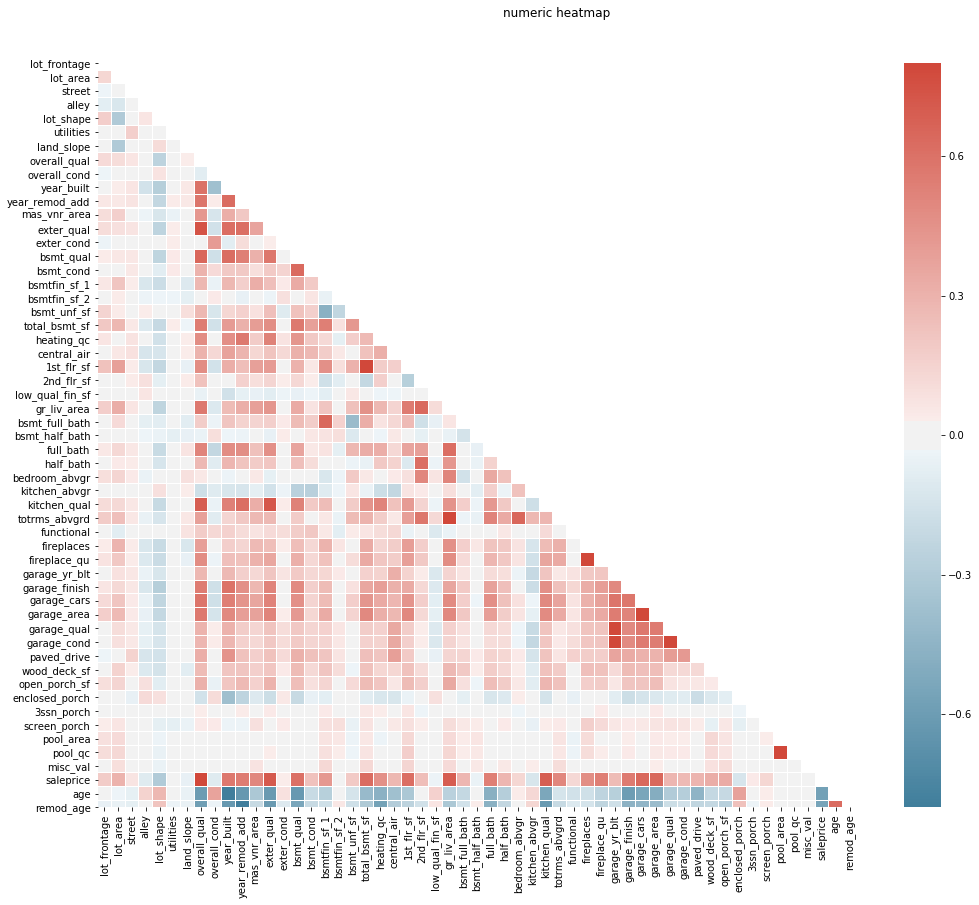

In [44]:
# https://jovianlin.io/data-visualization-seaborn-part-2/

corr = train.corr()

fig, (ax) = plt.subplots(1, 1, figsize=(17, 13))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

heatmap = sns.heatmap(corr, 
                      mask=mask, 
                      ax=ax, 
                      cmap= sns.diverging_palette(230, 15, as_cmap=True),
                      vmin=-0.8, 
                      vmax=0.8, 
                      fmt='.1f',
                      linewidths=.05)

fig.subplots_adjust(top=.92)
fig.suptitle('numeric heatmap')

In [23]:
train['price_sf'] = train['saleprice'] / train['gr_liv_area']

In [24]:
def box(df, x, y):
    
    plt.figure(figsize=(13,8))

    sns.boxplot(
        x = x,
        y = y,
        data = df,
        palette = 'GnBu'
    )

    plt.xlabel(f'{x}', fontsize = 12)
    plt.ylabel(f'{y}', fontsize = 12)
    plt.title(f'{y} vs. {x}', fontsize = 14)

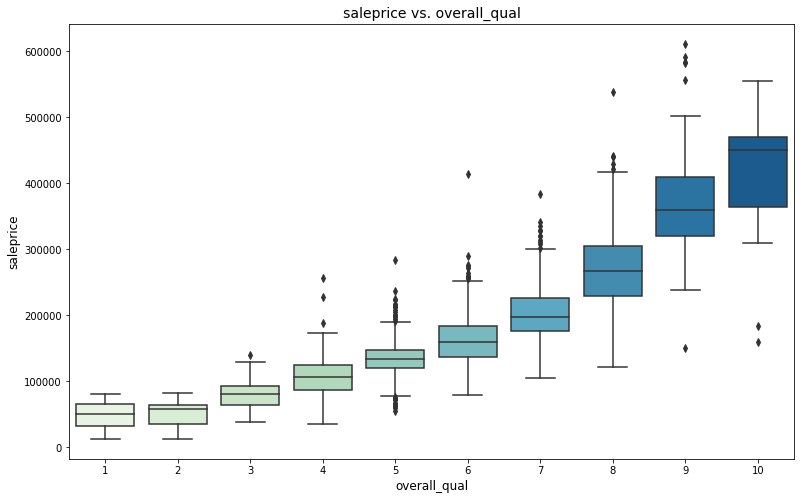

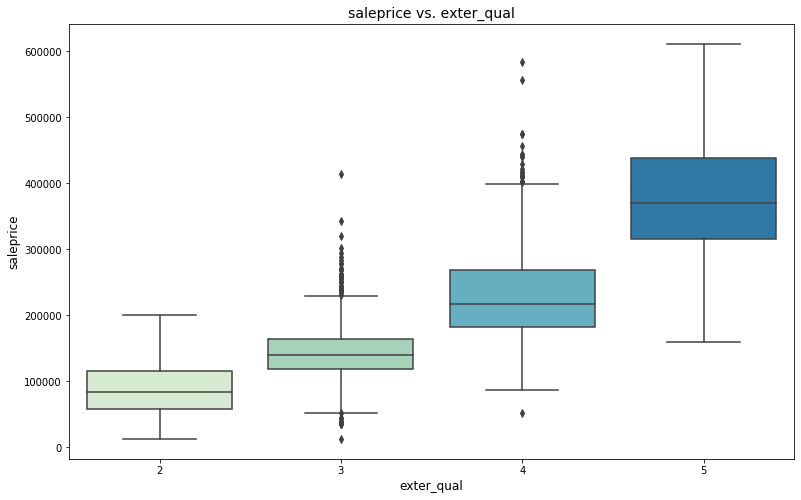

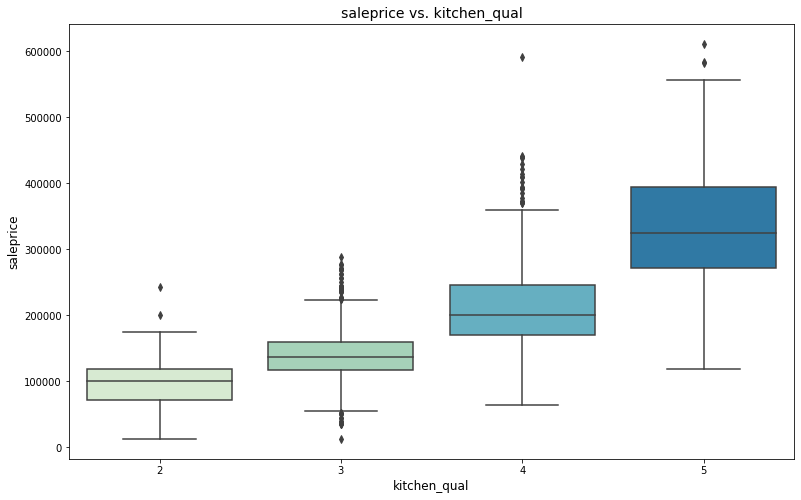

In [25]:
for x in ['overall_qual', 'exter_qual', 'kitchen_qual']:
    box(train, x, 'saleprice')

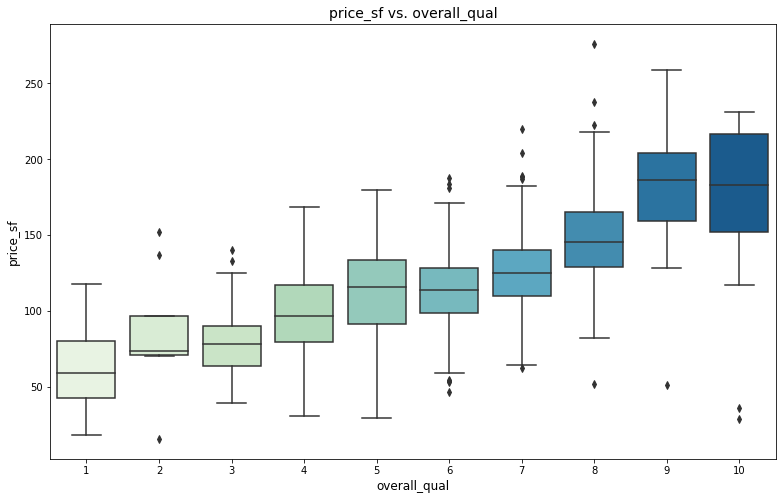

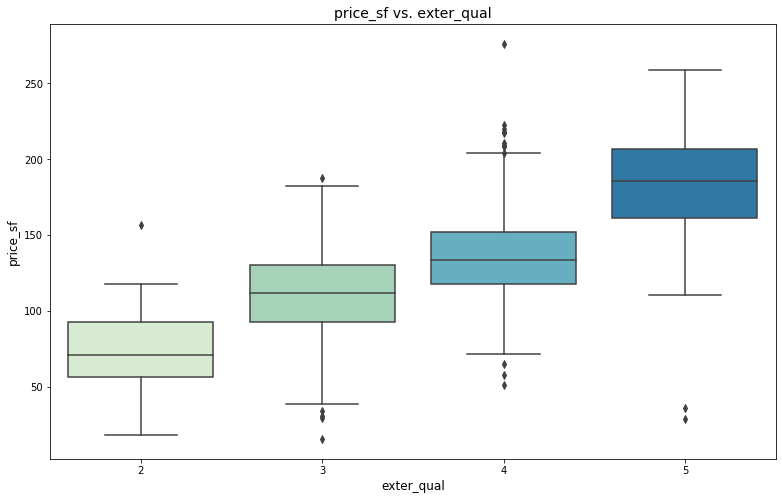

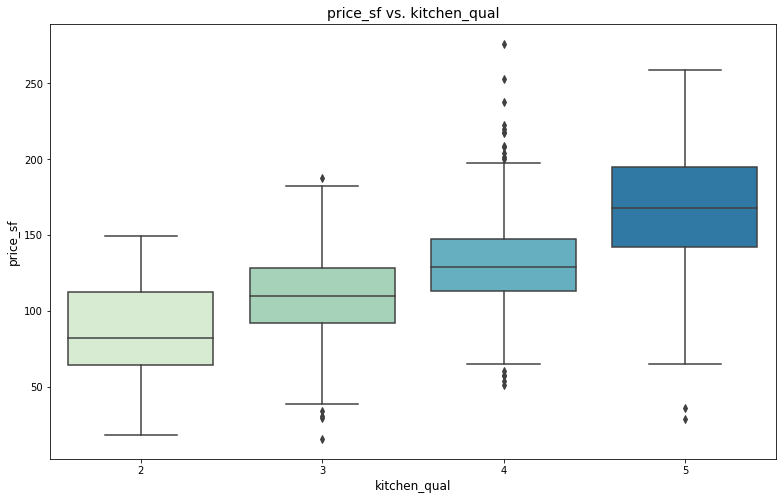

In [26]:
for x in ['overall_qual', 'exter_qual', 'kitchen_qual']:
    box(train, x, 'price_sf')

In [27]:
def joint(df, x, y):

    sns.jointplot(
        x = x,
        y = y,
        data = df,
        kind = 'reg',
        height = 8,
        scatter_kws = {'alpha': 0.25, 'edgecolor': 'white'}   
    )

    plt.xlabel(f'{x}', fontsize = 12)
    plt.ylabel(f'{y}', fontsize = 12)
    plt.title(f'{y} vs. {x}', fontsize = 14)

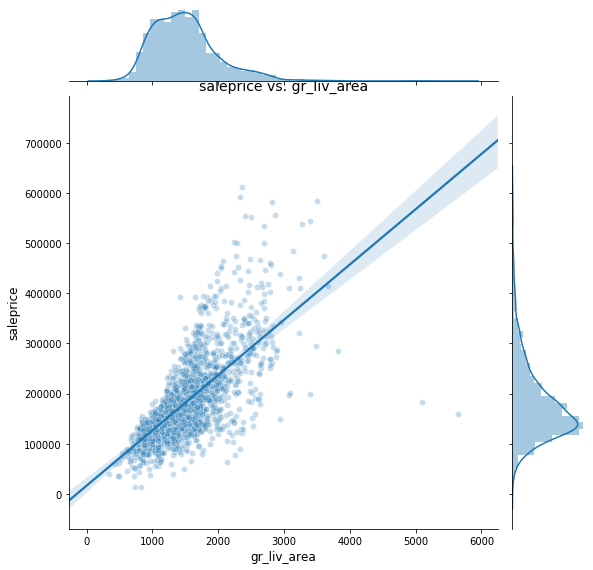

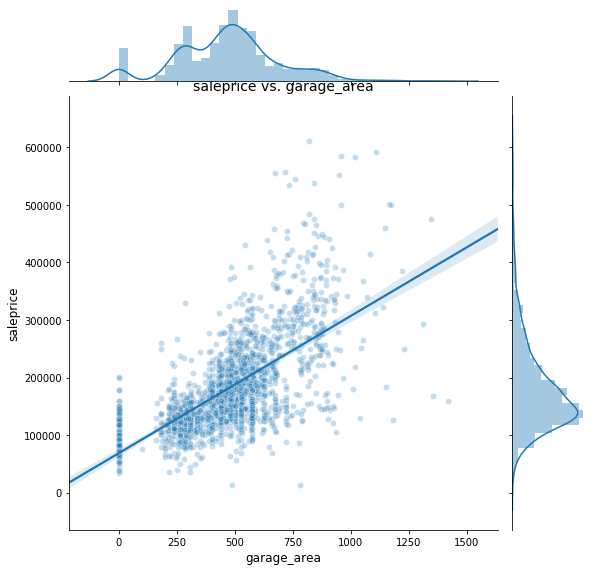

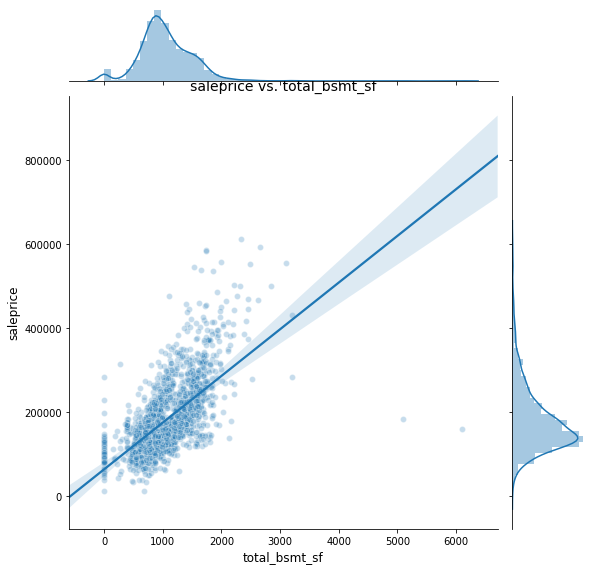

In [28]:
for x in ['gr_liv_area', 'garage_area', 'total_bsmt_sf']:
    joint(train, x, 'saleprice')

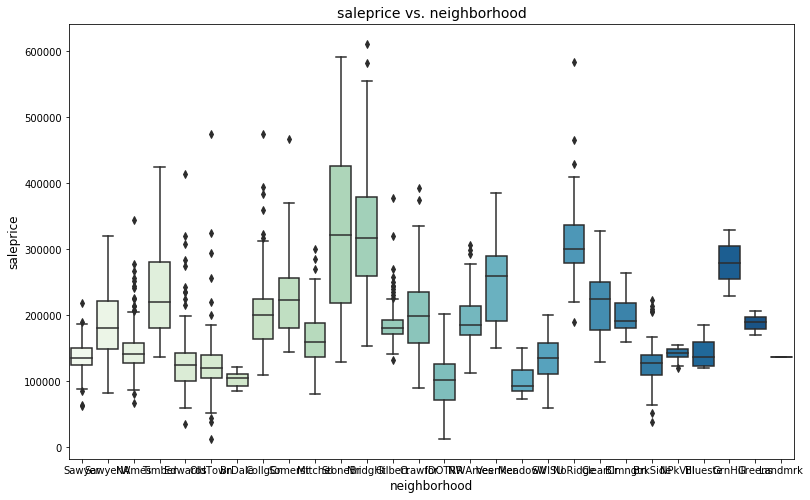

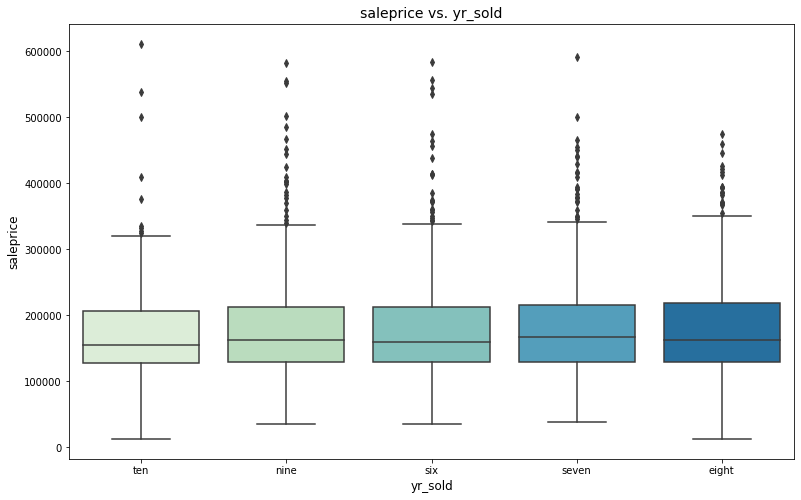

In [29]:
for x in ['neighborhood', 'yr_sold']:
    box(train, x, 'saleprice')

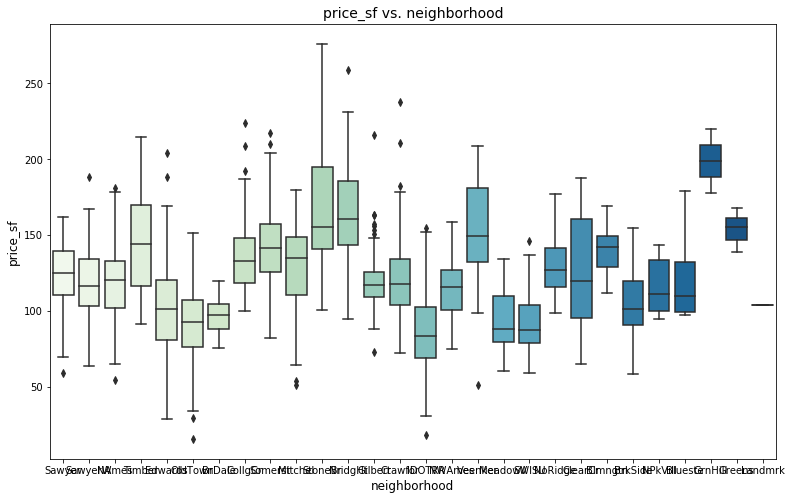

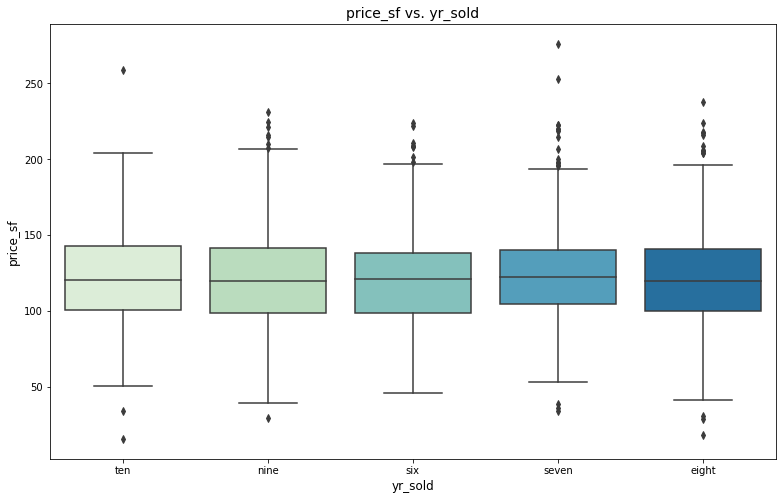

In [30]:
for x in ['neighborhood', 'yr_sold']:
    box(train, x, 'price_sf')

## combining all EDA steps into one

We'll make a new function to contain all of our EDA steps so that we can pre-process our test data the same way.

In [52]:
def EDA(df):

    drop_cols = ['Id', 'PID', 'Pool QC', 'Misc Feature', 'Alley', 'Fence']

    for col in drop_cols:
        try:
            df = df.drop(columns=[col])
        except:
            pass
    
    df = df_column_renamer(df)
    df = fill_none(df)
    df = number_to_category(df)
    df = category_to_number(df)
    df = year_to_age(df)
    
    return df

In [53]:
train = pd.read_csv('./data/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [54]:
test = pd.read_csv('./data/test.csv')
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [55]:
train = EDA(train)
train.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,age,remod_age
0,MSSC60,RL,0.0,13517,2,3,Lvl,4,CulDSac,3,...,0,0,0,0,mar,ten,WD,130500,34,5
1,MSSC60,RL,43.0,11492,2,3,Lvl,4,CulDSac,3,...,0,0,0,0,apr,nine,WD,220000,13,12
2,MSSC20,RL,68.0,7922,2,4,Lvl,4,Inside,3,...,0,0,0,0,jan,ten,WD,109000,57,3
3,MSSC60,RL,73.0,9802,2,4,Lvl,4,Inside,3,...,0,0,0,0,apr,ten,WD,174000,4,3
4,MSSC50,RL,82.0,14235,2,3,Lvl,4,Inside,3,...,0,0,0,0,mar,ten,WD,138500,110,17


In [56]:
test = EDA(test)
test.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,age,remod_age
0,MSSC190,RM,69.0,9142,2,4,Lvl,4,Inside,3,...,112,0,0,0,0,apr,six,WD,96,56
1,MSSC90,RL,0.0,9662,2,3,Lvl,4,Inside,3,...,0,0,0,0,0,aug,six,WD,29,29
2,MSSC60,RL,58.0,17104,2,3,Lvl,4,Inside,3,...,0,0,0,0,0,sep,six,New,0,0
3,MSSC30,RM,60.0,8520,2,4,Lvl,4,Inside,3,...,184,0,0,0,0,jul,seven,WD,84,1
4,MSSC20,RL,0.0,9500,2,3,Lvl,4,Inside,3,...,0,0,185,0,0,jul,nine,WD,46,46


In [57]:
train.to_csv('./data/train_eda.csv', index=False)
test.to_csv('./data/test_eda.csv', index=False)